In [210]:

import os
import pandas as pd
import sklearn
import numpy as np

import re
import glob

import matplotlib.pyplot as plt


CWD = os.getcwd()
INPUT_FOLDER ='input_texts'


# "/*.txt" t2rn on oluline - loeme sisse koik failid
all_files = glob.glob(INPUT_FOLDER + "/*.txt")


nr_of_docs = len(all_files)
print("Tekste sisse loetud >> " + str(nr_of_docs))

li = []
for filename in all_files:
    item = []
    doc_id = filename.rsplit('.', 1)[0].rsplit('/',2)[1]
    item.append(doc_id)
    
    with open(filename, 'r', encoding="utf8") as f:
        text = f.read()
    item.append(text)
    li.append(item)
    
df = pd.DataFrame(li, columns = ['doc_id', 'text'])
df['text'] = df['text'].astype(str)



Tekste sisse loetud >> 8


In [211]:
df.head()

,doc_id,text
0,doc_555555551111_item,Norra keskosas kukkus täna kaubanduskeskusele ...
1,doc_666666663332_item,Investeerimisest on saanud Eesti avalikkuses r...
2,doc_555555550000_item,"Rootsi peaminister Ulf Kristersson ütles täna,..."
3,doc_555555550002_item,Brasiilia eelmise presidendi toetajad keelduva...
4,doc_666666662222_item,"Ajaleht The Times kirjutab, et kliimaaktivisti..."


In [212]:
stopwords_file = "estonian-stopwords.txt"
with open(stopwords_file, 'r', encoding='utf8') as f:
    STOPWORDS = f.read()
    STOPWORDS = STOPWORDS.replace('\n', ' ')
    STOPWORDS = STOPWORDS.split()
    STOPWORDS = set(STOPWORDS)

In [213]:
#STOPWORDS

In [214]:
# nyyd oleme j6udnud sisendteksti sammu juurest j2rgmise sammuni - eelt88tlus
# re.compile teeb 
# TODO check re compile list
# TODO kass strip ! , . ? jne
def text_prepare(text, STOPWORDS):
    #replace_by_space_re = re.compile('\ |\?|\.|\!|\/|\;|\:|\n|\r')
    replace_by_space_re = re.compile('[\n\"\'/(){}\[\]\|@,;#.]')
    text = re.sub(replace_by_space_re, ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.lower()
    
    text = ' '.join([word for word in text.split() if word not in STOPWORDS])
    
    #to_replace_list = ['\\n', '&quot', '\\xa0']    
    #for element in to_replace_list:
    #    text.replace(element, ' ')  
    
    text = text.strip()
    return text

In [215]:
# lisame oma dataframele uue tyhja tulba 
df['clean_text'] = ''
df.head()

,doc_id,text,clean_text
0,doc_555555551111_item,Norra keskosas kukkus täna kaubanduskeskusele ...,
1,doc_666666663332_item,Investeerimisest on saanud Eesti avalikkuses r...,
2,doc_555555550000_item,"Rootsi peaminister Ulf Kristersson ütles täna,...",
3,doc_555555550002_item,Brasiilia eelmise presidendi toetajad keelduva...,
4,doc_666666662222_item,"Ajaleht The Times kirjutab, et kliimaaktivisti...",


In [216]:
df['clean_text'] = df['text'].apply(lambda x: text_prepare(x, STOPWORDS))
df.head()

,doc_id,text,clean_text
0,doc_555555551111_item,Norra keskosas kukkus täna kaubanduskeskusele ...,norra keskosas kukkus täna kaubanduskeskusele ...
1,doc_666666663332_item,Investeerimisest on saanud Eesti avalikkuses r...,investeerimisest eesti avalikkuses rahvussport...
2,doc_555555550000_item,"Rootsi peaminister Ulf Kristersson ütles täna,...",rootsi peaminister ulf kristersson ütles täna ...
3,doc_555555550002_item,Brasiilia eelmise presidendi toetajad keelduva...,brasiilia presidendi toetajad keelduvad endise...
4,doc_666666662222_item,"Ajaleht The Times kirjutab, et kliimaaktivisti...",ajaleht the times kirjutab kliimaaktivistid va...


In [217]:
df.iloc[2].clean_text[0:400]

'rootsi peaminister ulf kristersson ütles täna rootsi täida tingimusi türgi nato-ga liitumiseks esitanud kristersson kindel türgi kiidab rootsi nato-ga liitumise rootsi täitnud tingimusi türgi toetuse andmiseks seadnud „türgi kinnitab lubasime ütlevad tahavad asju anda “ ütles kristersson rootsis toimunud kaitsevaldkonna mõttekodade konverentsil vahendab reuters soome rootsi sõlmisid türgiga mullu '

In [218]:
def show_wordcloud(col):
    from wordcloud import WordCloud
    wordcloud = WordCloud().generate(' '.join(df[col]))
    plt.figure(figsize = (5, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

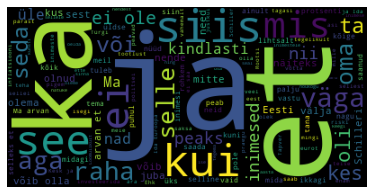

In [193]:
show_wordcloud('text')

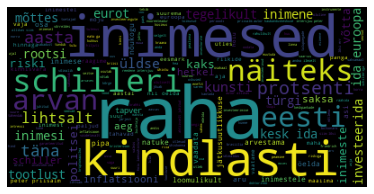

In [194]:
show_wordcloud('clean_text')

In [219]:
# nyyd oleme valmise teksti eelt88tluse sammuga, saab endasi minna vektoriseerimise juurde
#
#max_df
#When building the vocabulary ignore terms that have a document 
#frequency strictly higher than the given threshold (corpus-specific stop words). 
#
#min_df
#When building the vocabulary ignore terms that have a 
#document frequency strictly lower than the given threshold. 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), max_df=0.7, min_df = 2)
tf_idf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

In [220]:
tf_idf_matrix

<8x139 sparse matrix of type '<class 'numpy.float64'>'
	with 310 stored elements in Compressed Sparse Row format>

In [221]:
tf_idf_matrix[0]

<1x139 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [198]:
#
#test_features = tfidf_vectorizer.get_feature_names_out(tf_idf_matrix)

In [222]:
example_df = pd.DataFrame(tf_idf_matrix[0].T.todense(), 
                          index=tfidf_vectorizer.get_feature_names(), columns=["TF-IDF"])
example_df = example_df.sort_values('TF-IDF', ascending=False)
print (example_df.head(15))

            TF-IDF
politsei  0.677773
kohalik   0.271109
täna      0.271109
käivad    0.157089
teatas    0.157089
esimene   0.157089
inimeste  0.157089
meedia    0.157089
tugev     0.157089
kohaliku  0.157089
ilmselt   0.157089
aja       0.157089
kirjutab  0.157089
ajaleht   0.157089
juhtus    0.157089


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [200]:

# tekstide v6rdlemine
# kui on suurem kogus tekste, on parem v6rrelda tekstide cosine_similarity

In [223]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_array = cosine_similarity(tf_idf_matrix[0: nr_of_docs], tf_idf_matrix)

In [224]:
cosine_similarity_array[0:4]

array([[1.        , 0.15689105, 0.08740323, 0.33483729, 0.15839053,
        0.49929819, 0.01313252, 0.0778277 ],
       [0.15689105, 1.        , 0.10974989, 0.10543225, 0.04103079,
        0.05321248, 0.4577001 , 0.19900553],
       [0.08740323, 0.10974989, 1.        , 0.12842147, 0.1327968 ,
        0.06847094, 0.04447356, 0.11963624],
       [0.33483729, 0.10543225, 0.12842147, 1.        , 0.        ,
        0.33650256, 0.03693321, 0.11435526]])

In [225]:
matches_df = pd.DataFrame(columns = [
    'similarity',
    'text0_id',
    'text1_id'   
])

for x in range(0, nr_of_docs):
    for y in range(0, nr_of_docs):
        if x != y:
            row = [
                cosine_similarity_array[x][y],
                df.iloc[x].doc_id,
                df.iloc[y].doc_id              
            ]
            row = pd.Series(row, index = matches_df.columns)
            matches_df = matches_df.append(row, ignore_index = True)

In [128]:
len(matches_df)

6

In [129]:
matches_df.head()

,similarity,text0_id,text1_id
0,0.365148,doc_555555550000_item,doc_555555550002_item
1,0.134840,doc_555555550000_item,doc_555555550001_item
2,0.365148,doc_555555550002_item,doc_555555550000_item
3,0.861640,doc_555555550002_item,doc_555555550001_item
4,0.134840,doc_555555550001_item,doc_555555550000_item


In [130]:
matches_df = matches_df.sort_values(by='similarity', ascending = False)

In [131]:
matches_df.head(10)

,similarity,text0_id,text1_id
3,0.861640,doc_555555550002_item,doc_555555550001_item
5,0.861640,doc_555555550001_item,doc_555555550002_item
0,0.365148,doc_555555550000_item,doc_555555550002_item
2,0.365148,doc_555555550002_item,doc_555555550000_item
1,0.134840,doc_555555550000_item,doc_555555550001_item
4,0.134840,doc_555555550001_item,doc_555555550000_item


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f288a54c850>]],
      dtype=object)

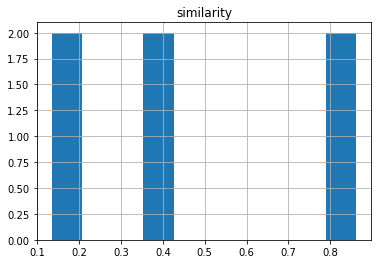

In [132]:
matches_df.hist()

In [ ]:
## YL

In [ ]:
##1. 3 teksti
##2. olulised sõnad

In [136]:
example_df = pd.DataFrame(tf_idf_matrix[0].T.todense(), 
                          index=tfidf_vectorizer.get_feature_names(), columns=["TF-IDF"])
example_df = example_df.sort_values('TF-IDF', ascending=False)
print (example_df.head(15))

               TF-IDF
toimunud     0.894427
väidetavalt  0.447214
paljud       0.000000
politsei     0.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [137]:

example_df = pd.DataFrame(tf_idf_matrix[1].T.todense(), 
                          index=tfidf_vectorizer.get_feature_names(), columns=["TF-IDF"])
example_df = example_df.sort_values('TF-IDF', ascending=False)
print (example_df.head(15))

               TF-IDF
politsei     0.816497
paljud       0.408248
toimunud     0.408248
väidetavalt  0.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [139]:
example_df = pd.DataFrame(tf_idf_matrix[2].T.todense(), 
                          index=tfidf_vectorizer.get_feature_names(), columns=["TF-IDF"])
example_df = example_df.sort_values('TF-IDF', ascending=False)
print (example_df.head(15))

               TF-IDF
politsei     0.904534
paljud       0.301511
väidetavalt  0.301511
toimunud     0.000000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [140]:
tf_idf_matrix[2]

<1x4 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
##3. Võrdlus olemasolevate tekstidega 

In [177]:
query_result=matches_df[matches_df['text0_id'].str.contains('1111')]

In [180]:
query_result = query_result.sort_values(by='similarity', ascending = False)

In [181]:
query_result.head(10)

,similarity,text0_id,text1_id
1,0.424264,doc_555555551111_item,doc_555555550002_item
0,0.400000,doc_555555551111_item,doc_555555550000_item
2,0.316228,doc_555555551111_item,doc_555555550001_item


In [227]:
##4. Sama teema tekstid on sarnasemad
query_result=matches_df[matches_df['text0_id'].str.contains('66666')]
query_result = query_result.sort_values(by='similarity', ascending = False)
query_result.head(4)

,similarity,text0_id,text1_id
12,0.457700,doc_666666663332_item,doc_666666663331_item
43,0.457700,doc_666666663331_item,doc_666666663332_item
34,0.306042,doc_666666662222_item,doc_666666662221_item
53,0.306042,doc_666666662221_item,doc_666666662222_item
